Link kaggle: https://www.kaggle.com/datasets/sagnikpatra/uci-adult-census-data-dataset

| Feature               | Ghi chú                                                                 |
| --------------------- | ----------------------------------------------------------------------- |
| age                   | Tuổi                                                                    |
| workclass             | Loại công việc/việc làm, có missing values                              |
| fnlwgt                | Trọng số mẫu (sampling weight) trong khảo sát dân số                    |
| education             | Trình độ học vấn (bachelor, HS-grad, some-college, …)                   |
| education-num         | Số năm học tương ứng với education                                      |
| marital-status        | Tình trạng hôn nhân (married, divorced, never-married, …)               |
| occupation            | Nghề nghiệp, có missing values                                          |
| relationship          | Mối quan hệ trong gia đình (husband, wife, own-child, …)                |
| race                  | Chủng tộc (White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other) |
| sex                   | Giới tính (Male / Female)                                               |
| capital-gain          | Lợi nhuận vốn (thu nhập ngoài lương)                                    |
| capital-loss          | Lỗ vốn                                                                  |
| hours-per-week        | Số giờ làm việc mỗi tuần                                                |
| country        | Quốc tịch / nước gốc, có missing values                                 |
| **income** *(target)* | Nhãn thu nhập (dự đoán >50K hoặc ≤50K)                                  |


In [258]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading & Exploration

In [259]:
df=pd.read_csv("adult_train.csv")
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [261]:
df.isna().sum()/len(df)*100

Age               0.000000
Workclass         5.638647
fnlwgt            0.000000
Education         0.000000
Education_Num     0.000000
Martial_Status    0.000000
Occupation        5.660146
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_Gain      0.000000
Capital_Loss      0.000000
Hours_per_week    0.000000
Country           1.790486
Target            0.000000
dtype: float64

- Giá trị thiếu không nhiều, có thể dùng trung bình
- Các cột object khá nhiều
- Các cột như Sex, Target đổi về Int để train mô hình

In [262]:
df.nunique()

Age                  73
Workclass             8
fnlwgt            21648
Education            16
Education_Num        16
Martial_Status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_per_week       94
Country              41
Target                2
dtype: int64

In [263]:
df.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Age: Trung bình ~38 tuổi, đa số nằm từ 28–48 → lực lượng lao động trưởng thành là chính.
- fnlwgt: Biến trọng số, phân tán rất lớn (std cao), không dùng để phân tích trực tiếp.
- Education_Num: Trung bình 10 → tương đương tốt nghiệp cấp 3/college; đa số từ 9–12.
- Capital_Gain / Capital_Loss: Hầu hết bằng 0 (median = 0, 75% = 0) → dữ liệu rất lệch, chỉ vài người có giá trị lớn. Cột này không có giá trị trong quá trình huấn luyện
- Hours_per_week: Trung bình ~40h, đúng mô hình làm việc full-time; min = 1, max = 99 → có ngoại lệ.
- Target: Median = 1, mean = 0.76 → tập dữ liệu lệch mạnh, đa số thuộc lớp 1.  
=> Tổng thể: Dữ liệu bị skew mạnh ở Capital_Gain/Loss và Target

# Visualize Data

In [264]:
df.Target.value_counts()

Target
<=50K    24720
>50K      7841
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

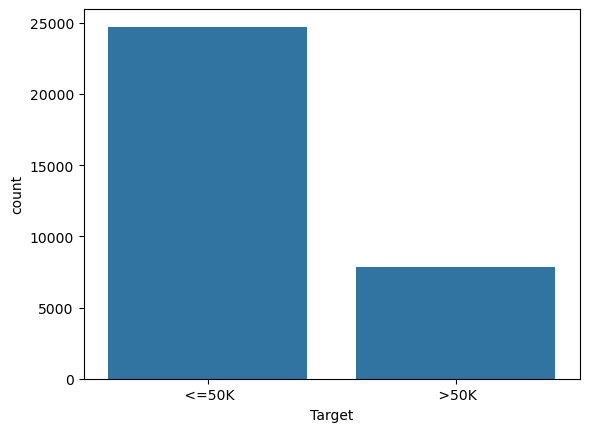

In [265]:
sns.countplot(data=df, x='Target')

- Dễ thấy đây là Imbalance Data
- Giải pháp: có thể dùng SMOTE

## Object

In [266]:
obj_cols=list(df.select_dtypes(include='object').columns)
obj_cols

['Workclass',
 'Education',
 'Martial_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Country',
 'Target']

<Axes: xlabel='Workclass', ylabel='count'>

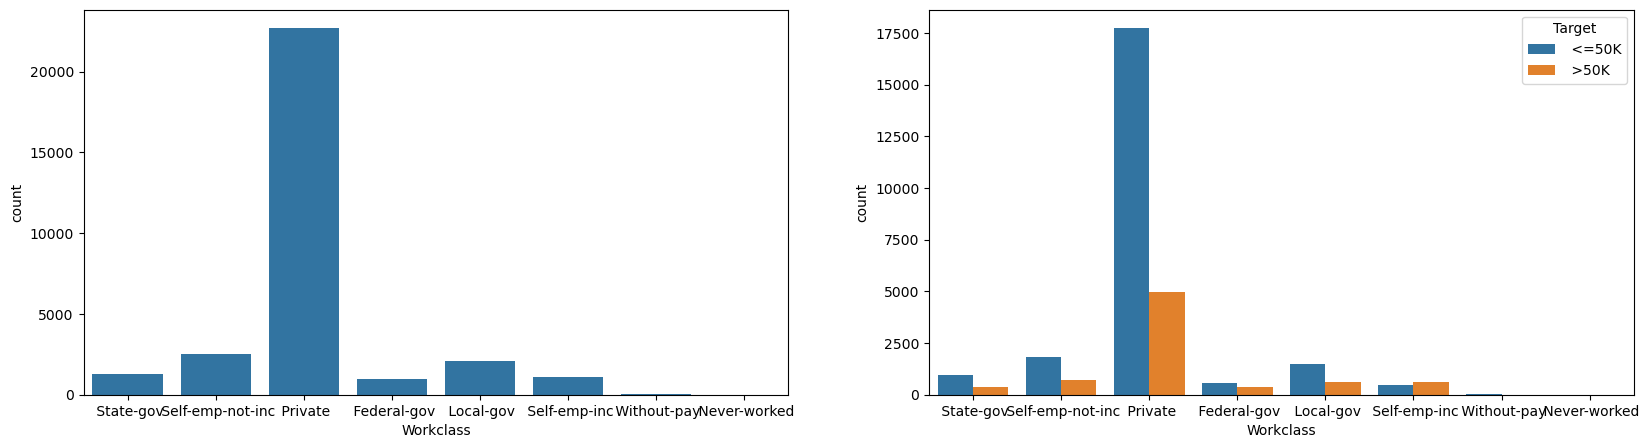

In [267]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="Workclass", data=df, ax=ax[0])
sns.countplot(x="Workclass", data=df, hue='Target', ax=ax[1])

- Ở đây Private chiếm số lượng tổng thể rất lớn
- Giải pháp có thể là gộp các công việc khác thành others

<Axes: xlabel='Education', ylabel='count'>

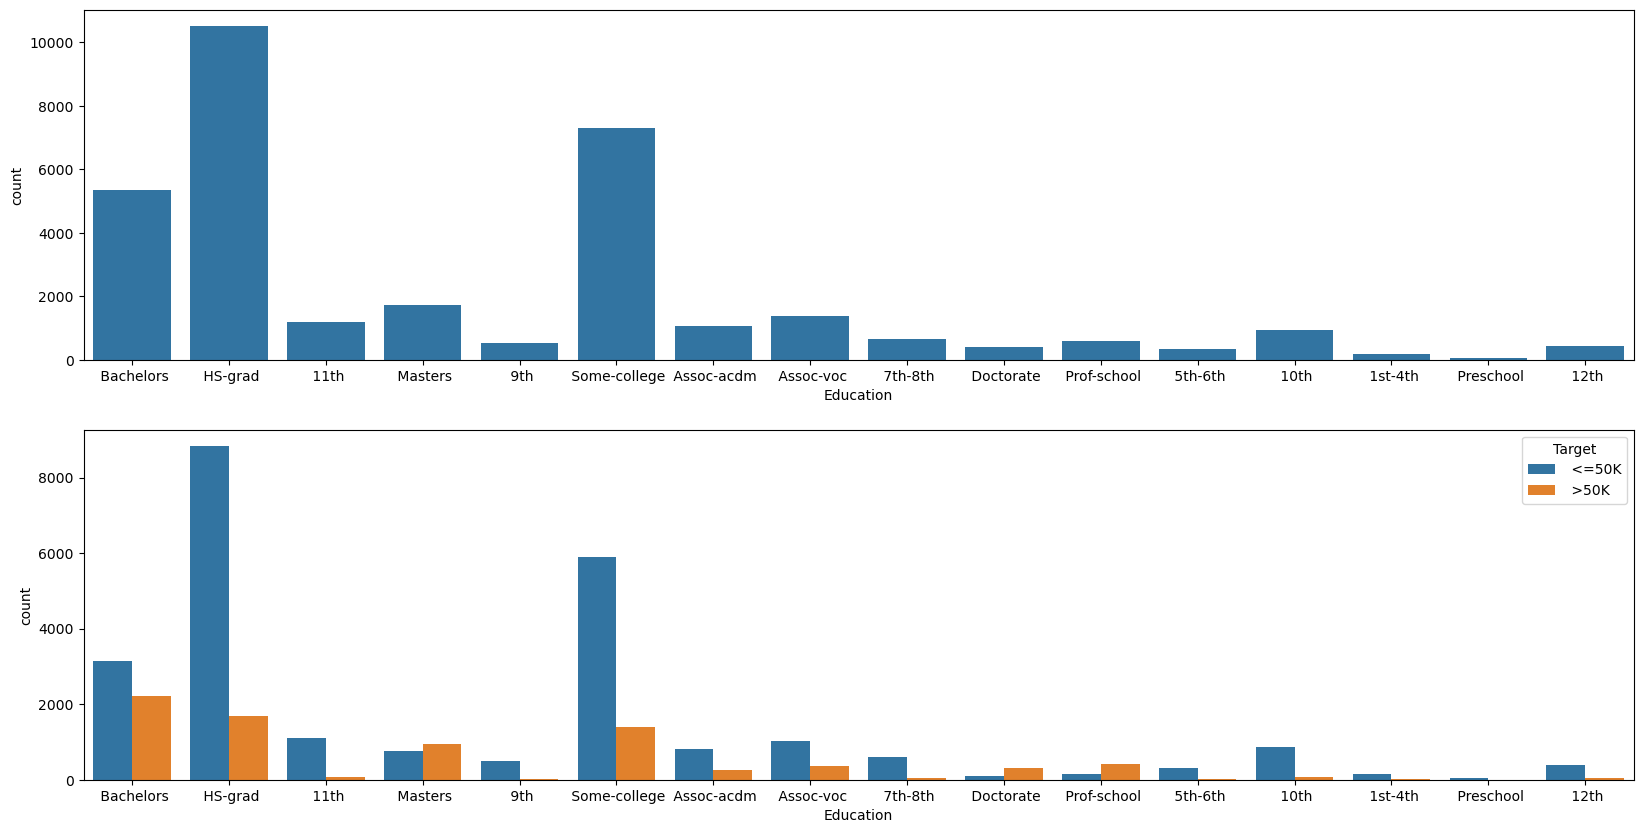

In [268]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Education',ax=ax[0])
sns.countplot(data=df, x='Education',hue='Target',ax=ax[1])

Sự khác biệt về số lượng người đạt mức thu nhập <=50K so với >50K thể hiện rõ ràng có mối liên hệ mật thiết với Trình độ Học vấn (Education):
- Trình độ Học vấn Thấp/Trung bình (HS-grad, Some-college): Tuy chiếm số lượng tuyệt đối rất đông, nhưng tỷ lệ người đạt mức thu nhập >50K so với <=50K là rất thấp.
- Trình độ Học vấn Cao (Bachelors, Masters, Doctorate, Prof-school): Tuy số lượng người ít hơn các nhóm trên, nhưng tỷ lệ người đạt mức thu nhập >50K so với <=50K cao hơn hẳn, đặc biệt là ở nhóm Doctorate và Prof-school.

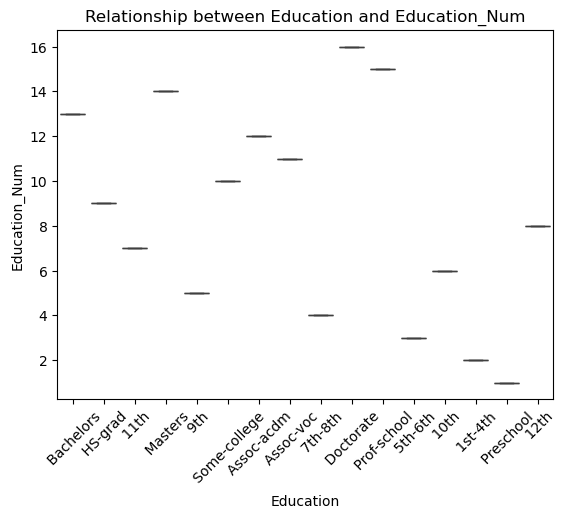

In [269]:
sns.boxplot(x="Education", y="Education_Num", data=df)
plt.xticks(rotation=45)  # xoay nhãn nếu dài
plt.title("Relationship between Education and Education_Num")
plt.show()

- Dựa vào biểu đồ boxplit giữa Education_Num và Education, chứng minh rằng Education_Num và Education có quan hệ 1-1
- Giải pháp sẽ xóa cột Education chỉ giữ lại Education_Num để cho mô hình học tốt hơn,tránh trùng lặp thông tin, giảm chiều dữ liệu

<Axes: xlabel='Martial_Status', ylabel='count'>

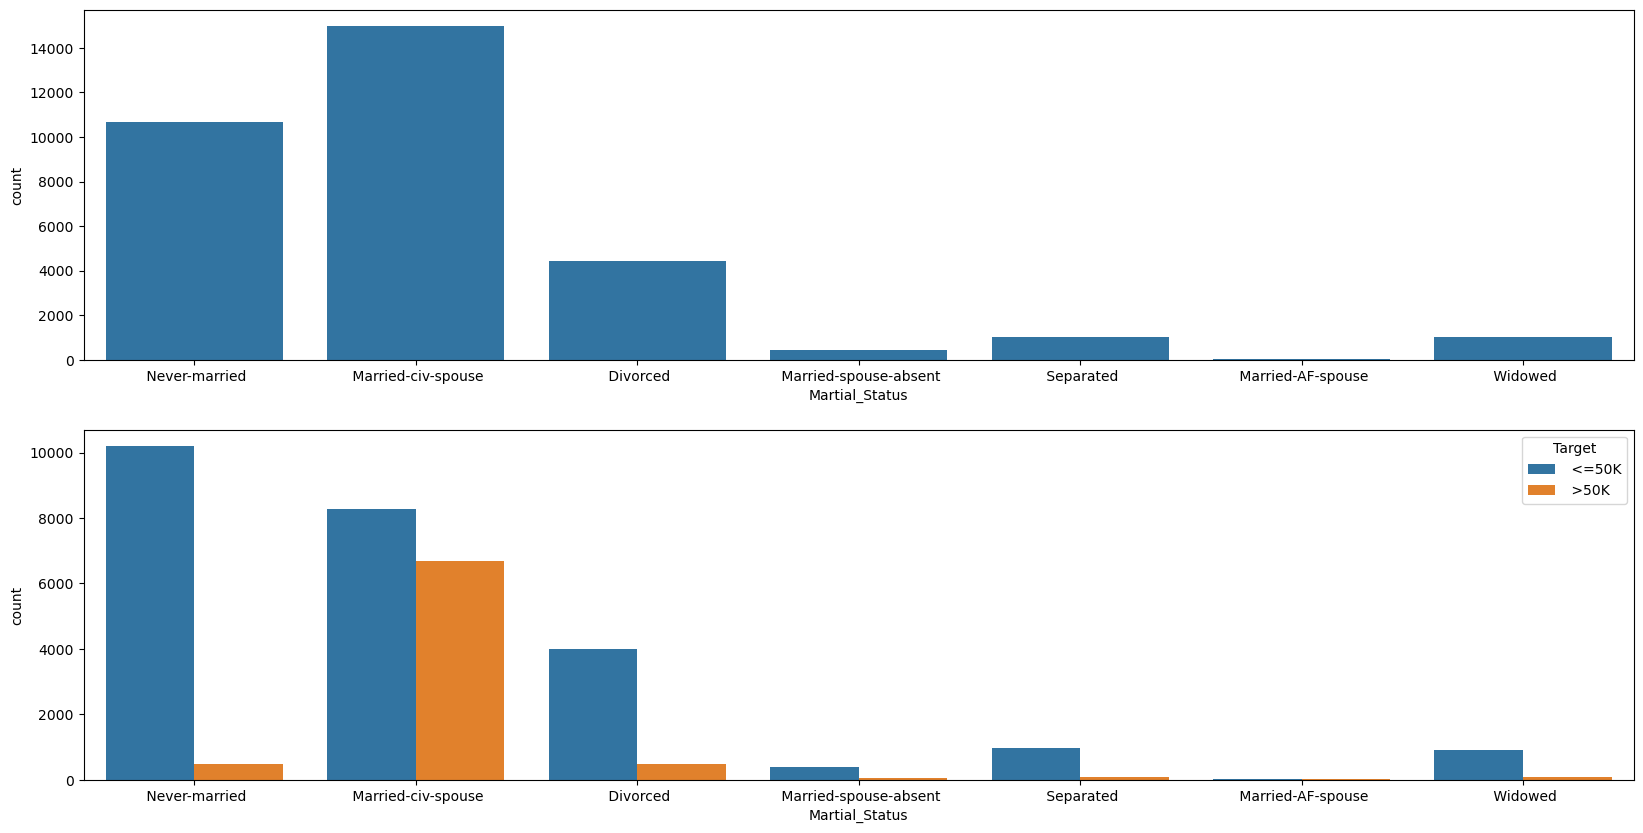

In [270]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Martial_Status',ax=ax[0])
sns.countplot(data=df, x='Martial_Status',hue='Target',ax=ax[1])

Biểu đồ Tình trạng Hôn nhân cho thấy nhóm thu nhập <=50K (màu cam) có xu hướng chiếm ưu thế hoặc ngang bằng với nhóm >50K ở một số tình trạng hôn nhân:
- Never-married (Chưa bao giờ kết hôn): Có số lượng người thu nhập <=50K vượt trội hoàn toàn so với nhóm >50K.
- Married-civ-spouse (Đã kết hôn/Vợ chồng dân sự): Có số lượng người thu nhập <=50K gần tương đương với nhóm >50K.

Điều này cho thấy tình trạng chưa kết hôn hoặc đã kết hôn có mối liên hệ mạnh mẽ và khác biệt rõ rệt với khả năng nằm trong nhóm thu nhập <=50K.

- Giải pháp sẽ gộp các tình trạng hôn nhân ít phổ biến (như Separated, Married-AF-spouse, Married-spouse-absent) thành một nhóm "Other" để giảm thiểu sự phân tán dữ liệu và giúp mô hình học hiệu quả hơn

<Axes: xlabel='Occupation', ylabel='count'>

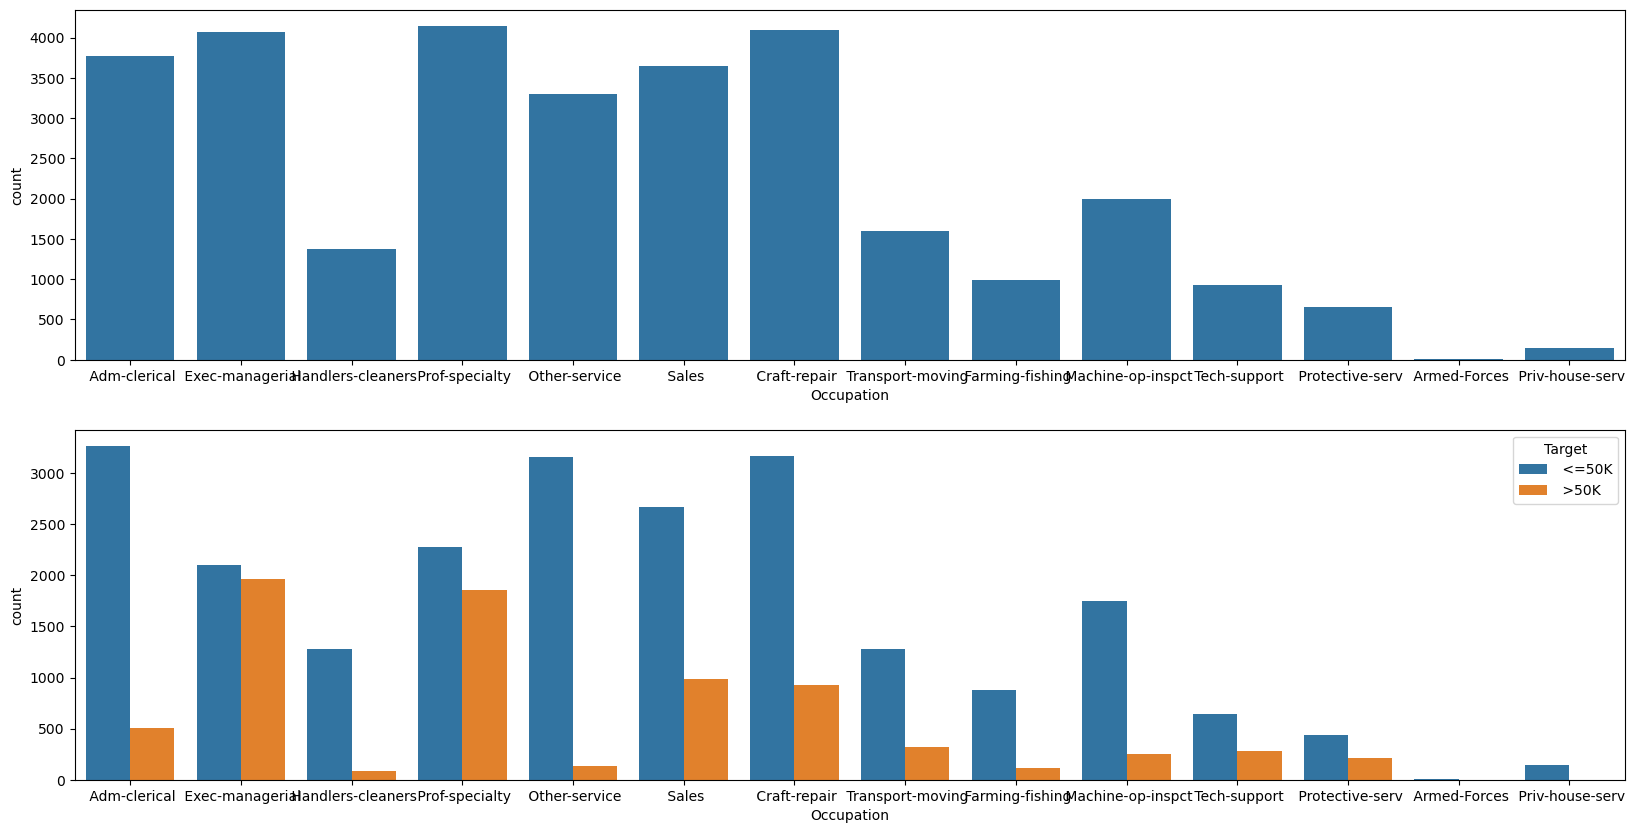

In [271]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Occupation',ax=ax[0])
sns.countplot(data=df, x='Occupation',hue='Target',ax=ax[1])

Các nghề nghiệp có nhóm thu nhập >50K chiếm tỷ trọng lớn là Exec-managerial (Quản lý cấp cao) và Prof-specialty (Chuyên gia/Chuyên môn). Trong khi đó, các nghề khác (như Adm-clerical, Other-service, Craft-repair) bị nhóm thu nhập <=50K áp đảo hoàn toàn.

1. Nhóm 1: Thu nhập Cao (High-Value Jobs)  
Đặc điểm: Đây là nhóm có khả năng đạt mức thu nhập >50K cao nhất. Cột thu nhập cao chiếm tỷ lệ vượt trội hoặc tương đương với cột thu nhập thấp.  
Các nghề nghiệp: Exec-managerial, Prof-specialty.

2. Nhóm 2: Thu nhập Trung bình (Mid-Value Jobs)  
Đặc điểm: Nhóm này có số lượng người thu nhập <=50K chiếm đa số, nhưng nhóm >50K vẫn có số lượng đáng kể và cao hơn hẳn so với nhóm giá trị thấp.  
Các nghề nghiệp: Sales, Craft-repair, Transport-moving, Tech-support, Protective-serv.

3. Nhóm 3: Thu nhập Thấp/Khác (Low/Other-Value Jobs)  
Đặc điểm: Nhóm có khả năng đạt mức thu nhập >50K thấp nhất. Cột thu nhập <=50K áp đảo mạnh mẽ, trong khi nhóm thu nhập cao rất ít hoặc gần như bằng không.  
Các nghề nghiệp: Adm-clerical, Handlers-cleaners, Other-service, Farming-fishing, Machine-op-inspct, Armed-Forces, Priv-house-serv.

<Axes: xlabel='Country', ylabel='count'>

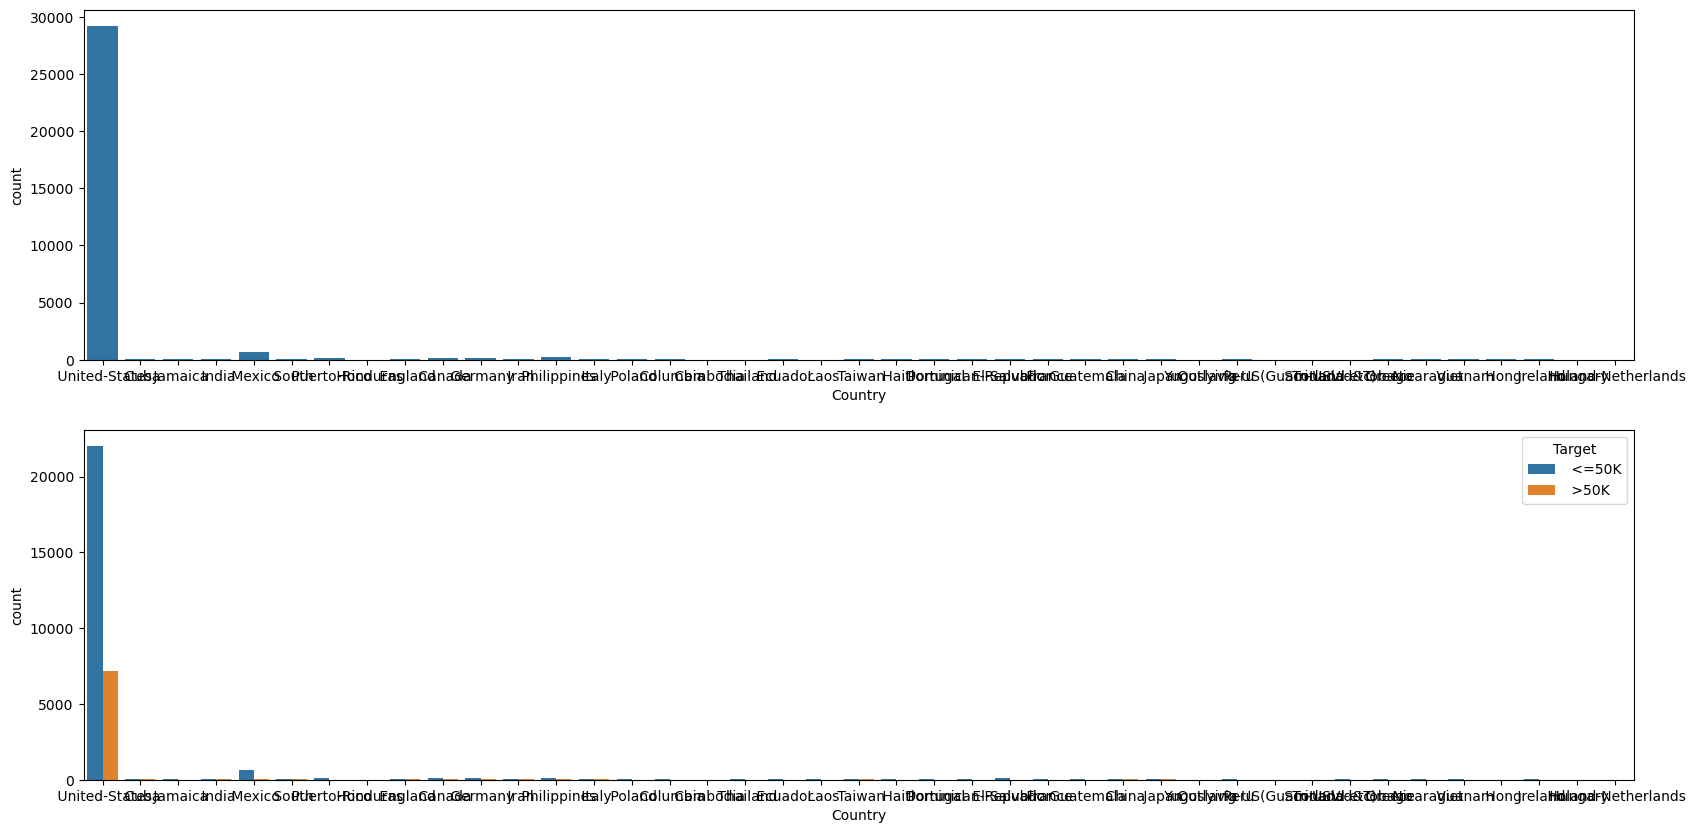

In [272]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Country',ax=ax[0])
sns.countplot(data=df, x='Country',hue='Target',ax=ax[1])

In [273]:
df.Country.value_counts()

Country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece              

- Bộ dataset chỉ thu thập chủ yếu ở US, vậy nên khi train model sẽ thiên về US nhiều hơn
- Giải pháp là xóa để tránh huấn luyện thiên về US

<Axes: xlabel='Relationship', ylabel='count'>

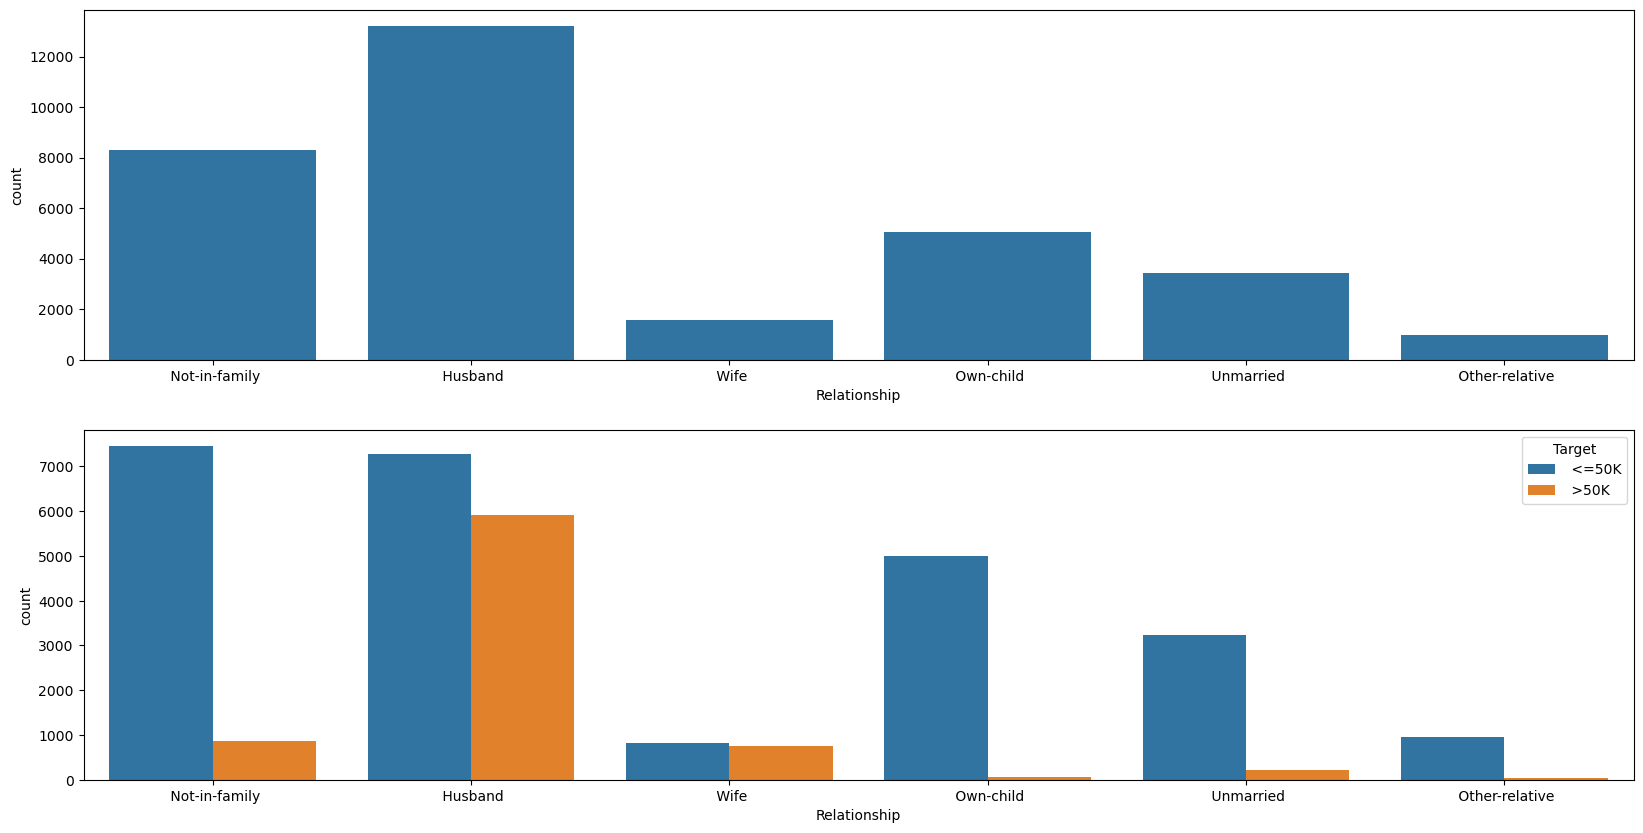

In [274]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Relationship',ax=ax[0])
sns.countplot(data=df, x='Relationship',hue='Target',ax=ax[1])

- Mất cân bằng, Husband và Not-in-family chiếm đa số.  
Giải pháp là gộp:  
- Nhóm Chính: Husband, Not-in-family.
- Nhóm Khác: Gộp tất cả các nhóm còn lại (Wife, Own-child, Unmarried, Other-relative) thành "Other_Relative" hoặc "Non_Head_Of_House".

<Axes: xlabel='Race', ylabel='count'>

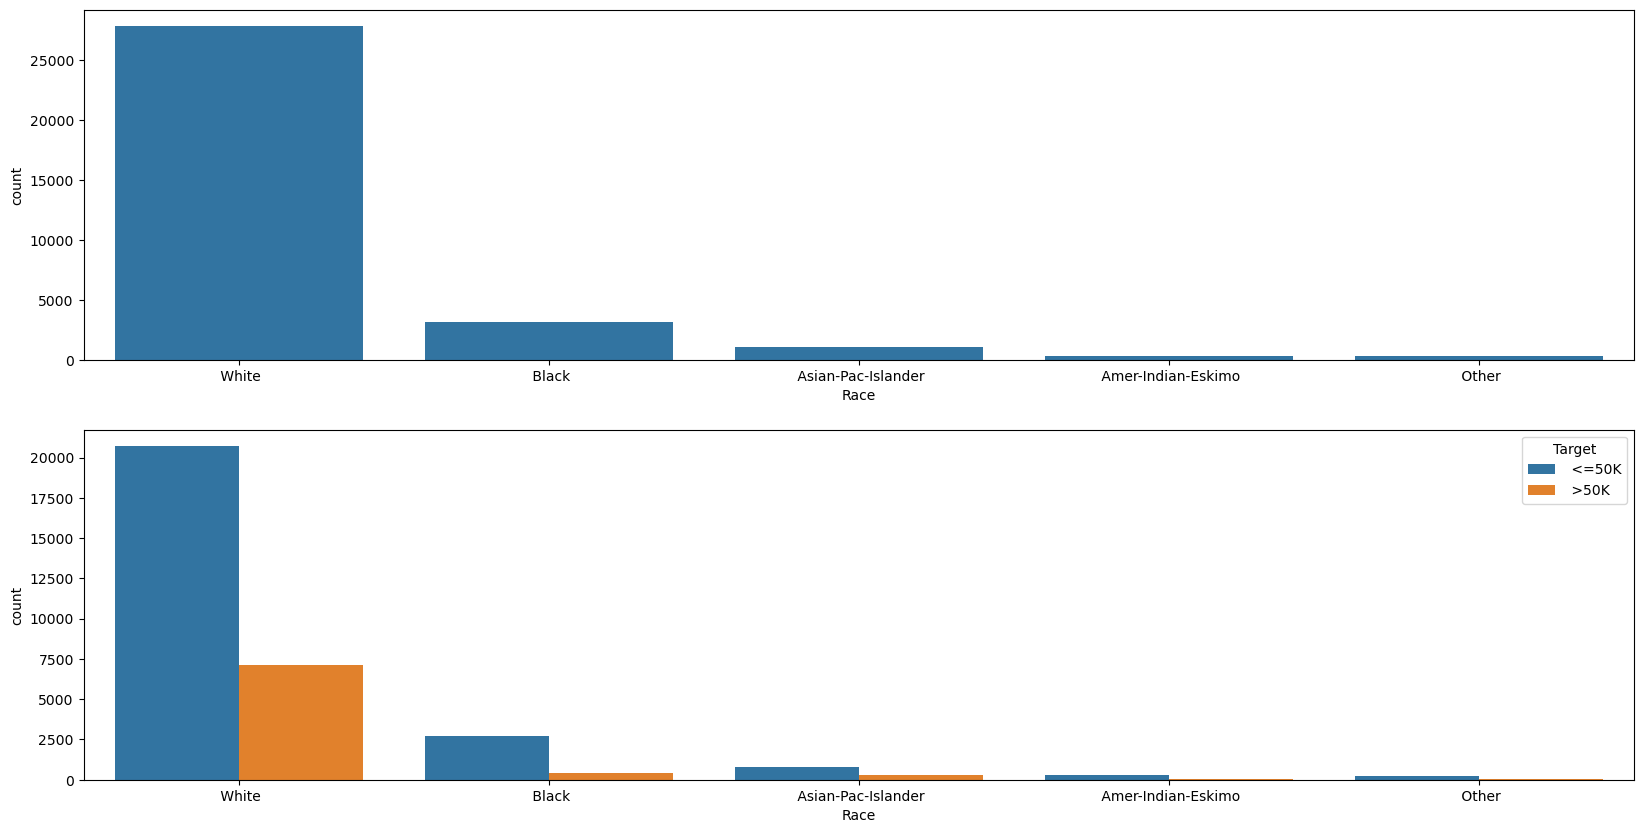

In [275]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Race',ax=ax[0])
sns.countplot(data=df, x='Race',hue='Target',ax=ax[1])

- Mất cân bằng cực độ, White áp đảo.  
Giải pháp Gộp:
- Nhóm Chính: White
- Nhóm Khác: Gộp tất cả các nhóm thiểu số (Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other) thành "Non_White".

## Numeric

In [276]:
Target=[0 if i == " <=50K" else 1 for i in df.Target]
set(Target)

{0, 1}

In [277]:
numeric_cols=df.drop(df.select_dtypes(include='object'),axis=1).columns
numeric_cols

Index(['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week'],
      dtype='object')

In [278]:
df_numeric = df[numeric_cols].copy()
df_numeric['Target'] = Target
df_numeric.corr()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
Hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
Target,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<Axes: >

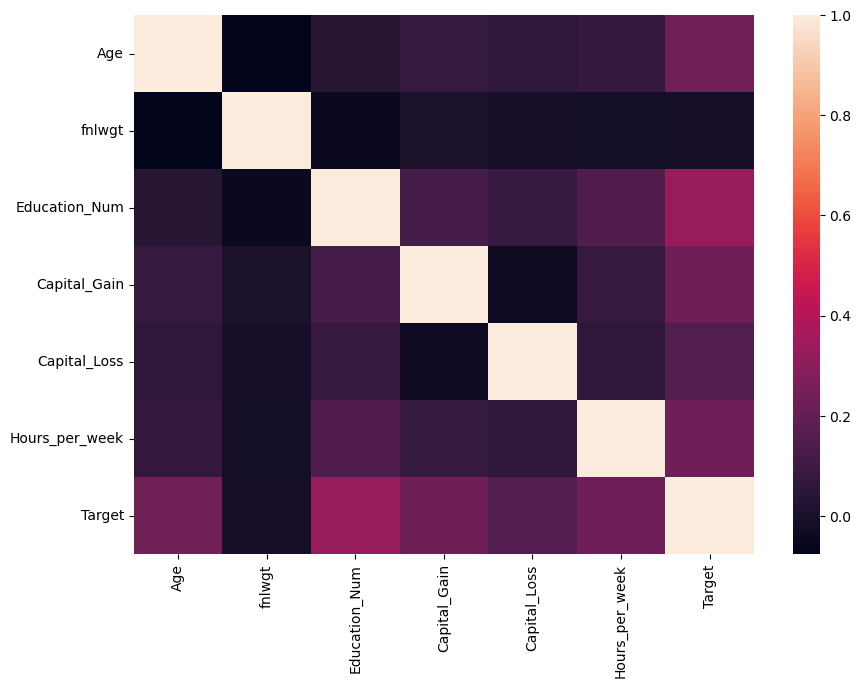

In [279]:
plt.figure(figsize=(10,7))
sns.heatmap(df_numeric.corr())

Các biến liên quan mạnh nhất đến thu nhập (Target):  

Top mạnh → yếu:  
- Education_Num (0.335) → Trình độ học vấn càng cao → thu nhập càng cao.
- Hours_per_week (0.229) → Làm nhiều giờ hơn → thu nhập cao hơn.
- Sex (0.216) → Giới tính ảnh hưởng đến thu nhập.
- Capital_Gain (0.223) → Có nguồn lợi tức từ đầu tư → thu nhập cao hơn.
- Age (0.234) → Tuổi cao hơn → thu nhập thường cao hơn.  

Liên quan yếu / gần như không đóng góp:
- fnlwgt, Capital_loss, Capital_Gain →  loại bỏ.

<Axes: xlabel='Education_Num'>

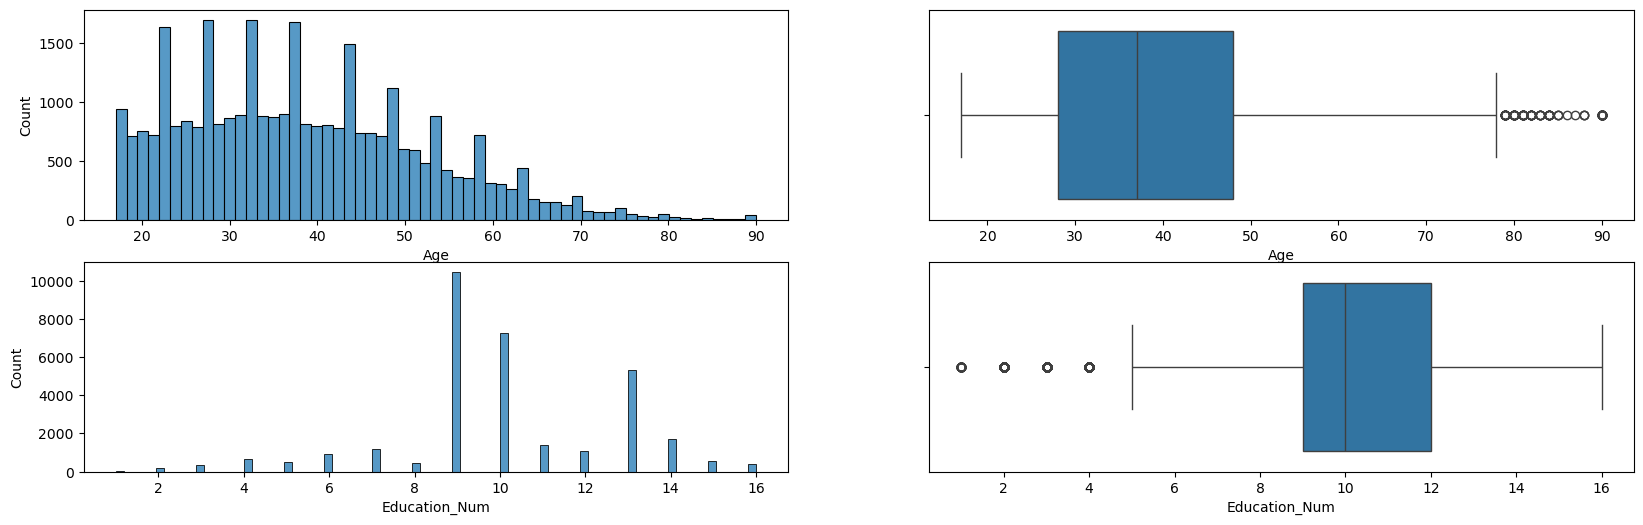

In [280]:
fig, ax = plt.subplots(2, 2, figsize=(20,6))
sns.histplot(data=df, x='Age', ax=ax[0,0])
sns.boxplot(data=df, x='Age', ax=ax[0,1])

sns.histplot(data=df, x='Education_Num', ax=ax[1,0])
sns.boxplot(data=df, x='Education_Num')

Age  
Dữ liệu bị lệch phải nặng  
Các Outliers chủ yếu ở nhóm trên 80
Giải pháp: gộp nhóm  
- 17 - 25: Thanh niên
- 26 - 40: Người trưởng thành/Lao động chính
- 41 - 60: Trung niên
- 60: Người lớn tuổi

Education Num  
Dữ liệu ít outliers, không cần xử lý
Giải pháp gộp:  
- 1, 2, 3, 4, 5, 6, 7, 8: Cơ bản/Chưa tốt nghiệp PTTH
- 9: Tốt nghiệp PTTH (HS-grad)
- 10, 11, 12: Học nghề/Cao đẳng (Some-college/Assoc)
- 13: Cử nhân (Bachelors)
- 14, 15, 16: Sau Đại học (Masters/Doctorate)

<Axes: xlabel='Hours_per_week'>

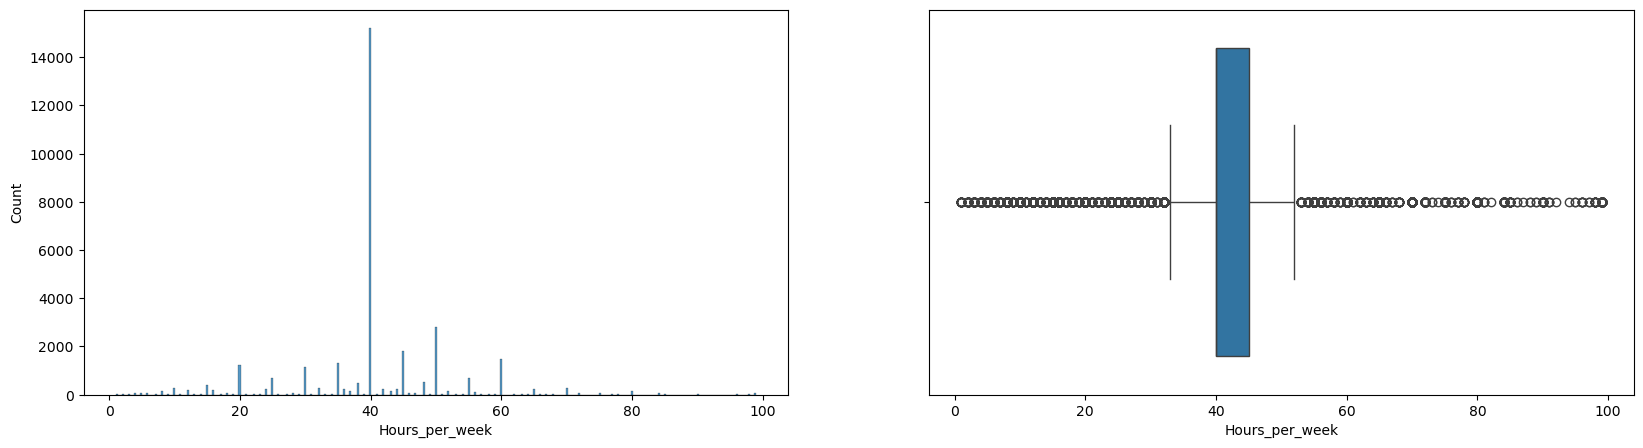

In [281]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(data=df, x='Hours_per_week', ax=ax[0])
sns.boxplot(data=df, x='Hours_per_week')

Dữ liệu phân bố không đều ở các khoảng 0-39, 40, 40-59, 60 trở đi, khiến cho Outliers trở nên nhiều hơn ở 2 đầu boxplot  
Giải pháp gộp: 
- <= 39: Bán thời gian (Part-time)
- 40: Toàn thời gian Chuẩn (Standard Full-time)
- 40-59: Tăng ca/Làm thêm vừa phải (Moderate Overtime)
- 60: Làm việc Quá sức (Heavy Overtime/Excessive Hours)

# Preprocessing

In [282]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [283]:
class BasePreprocessor:
    def __init__(self, file_path="adult_train.csv"):
        try:
            self.df = pd.read_csv(file_path)
        except FileNotFoundError:
            raise FileNotFoundError(f"File {file_path} not found")
        if self.df.empty:
            raise ValueError("DataFrame is empty")

    def preprocess(self):
        self.binning()
        self.scale_data()
        self.feature_engineering()
        return self.df

    def encode_categorical(self):
        pass

    def scale_data(self):
        pass

    def feature_engineering(self):
        pass

    @staticmethod
    def drop_columns(df, cols):
        return df.drop(columns=cols)

    def SMOTE(df):
        pass
    @staticmethod
    def fill_na_with_mean(df, col):
        df[col] = df[col].fillna(df[col].mean())
        return df


In [284]:
class EmployeePreprocessor(BasePreprocessor):

    def scale_data(self, method):
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns.drop('Target', errors='ignore')

        if method == "standard":
            scaler = StandardScaler()
        elif method == "minmax":
            scaler = MinMaxScaler()
        else:
            raise ValueError("method must be 'standard' or 'minmax'")

        self.df[num_cols] = scaler.fit_transform(self.df[num_cols])

    def encode_categorical(self):
        cat_cols = self.df.select_dtypes(include=['object', 'category']).columns
        if len(cat_cols) > 0:
            le = LabelEncoder()
            for col in cat_cols:
                self.df[col] = le.fit_transform(self.df[col])

    def binning(self):
        self.df = self.df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
        # Age
        self.df['Age'] = pd.cut(
            self.df['Age'],
            bins=[0, 25, 40, 60, 120],
            labels=['Young', 'Adult', 'Middle_Age', 'Senior']
        )

        # Country
        self.df["Country"] = self.df["Country"].apply(lambda x: 'Another' if x != 'United-States' else 'United-States')
        # Education_Num
        self.df['Education_Num'] = pd.cut(
            self.df['Education_Num'],
            bins=[0, 8, 9, 12, 13, 20],
            labels=['Low', 'HS-grad', 'Some-college/Assoc', 'Bachelors', 'Postgrad']
        )

        # Hours_per_week
        self.df['Hours_per_week'] = pd.cut(
            self.df['Hours_per_week'],
            bins=[0, 39, 40, 59, 168],
            labels=['Part-time', 'Standard Full-time', 'Moderate Overtime', 'Excessive Hours']
        )

        # Workclass
        self.df['Workclass'] = self.df['Workclass'].apply(lambda x: 'Private' if x == 'Private' else 'Other_Workclass')

        # Marital_Status
        married_set = {'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'}
        def map_marital(x):
            if x == 'Never-married':
                return 'Never-married'
            elif x in married_set:
                return 'Married'
            else:
                return 'Other_Marital'
        self.df['Martial_Status'] = self.df['Martial_Status'].apply(map_marital)

        # Occupation
        high = {'Exec-managerial', 'Prof-specialty'}
        mid = {'Sales', 'Craft-repair', 'Transport-moving', 'Tech-support', 'Protective-serv'}
        def map_occupation(x):
            if x in high:
                return 'High_Value_Job'
            elif x in mid:
                return 'Mid_Value_Job'
            else:
                return 'Low_Value_Job'
        self.df['Occupation'] = self.df['Occupation'].apply(map_occupation)

        # Relationship
        main_rel = {'Husband', 'Not-in-family'}
        self.df['Relationship'] = self.df['Relationship'].apply(lambda x: 'Main_Relationship' if x in main_rel else 'Other_Relationship')

        # Race
        self.df['Race'] = self.df['Race'].apply(lambda x: 'White' if x == 'White' else 'Non_White')
        self.df['Target'] = self.df['Target'].apply(lambda x: 0 if x == '<=50K' else 1)

    def SMOTE(self):

        x_train = self.df.drop('Target', axis=1)
        y_train = self.df['Target']

        smote = SMOTE(random_state=42)
        x_res, y_res = smote.fit_resample(x_train, y_train)

        # Lưu lại vào instance để dùng sau
        self.df = x_res.copy()
        self.df['Target'] = y_res

In [285]:
processor = EmployeePreprocessor("adult_train.csv")
processor.df = processor.drop_columns(processor.df, ['fnlwgt','Capital_Gain','Capital_Loss','Education'])
processor.scale_data('standard')
processor.binning()
processor.encode_categorical()
processor.SMOTE()  
df_preprocessed = processor.df


In [286]:
df_preprocessed.nunique()

Age               2
Workclass         2
Education_Num     2
Martial_Status    3
Occupation        3
Relationship      2
Race              2
Sex               2
Hours_per_week    2
Country           2
Target            2
dtype: int64

# Train Model

In [287]:
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [288]:
class BaseModelTrainer:
    def __init__(self):
        self.model = None
        self.X_train = self.X_test = self.y_train = self.y_test = None

    def load_data(self, df):
        pass

    def split_data(self, test_size):
        pass

    def train_model(self, model_type, **kwargs):
        pass

    def optimize_params(self, param_grid=None, cv=3, scoring='f1'):
        pass

    def evaluate(self):
        pass

    def save_model(self, file_path="model.pkl"):
        pass

    @staticmethod
    def load_model(file_path="model.pkl"):
        pass

In [289]:
class ModelTrainer(BaseModelTrainer):
    def load_data(self, df):
        self.df = df.copy()
        self.X = self.df.drop("Target", axis=1)
        self.y = self.df["Target"]

    def split_data(self, test_size):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=42, stratify=self.y
        )

    def train_model(self, model_type="RandomForest", **kwargs):
        if model_type == "RandomForest":
            self.model = RandomForestClassifier(random_state=42, **kwargs)
        elif model_type == "LogisticRegression":
            self.model = LogisticRegression(random_state=42, max_iter=500, **kwargs)
        elif model_type == "SVC":
            self.model = SVC(random_state=42, probability=True, **kwargs)
        else:
            raise ValueError("Unsupported model type")
        self.model.fit(self.X_train, self.y_train)


    def optimize_params(self, param_grid=None, cv=3, scoring='f1'):
        if self.model is None:
            raise ValueError("Train the model before optimizing")

        # Nếu param_grid không được truyền, chọn grid mặc định theo model
        if param_grid is None:
            if isinstance(self.model, RandomForestClassifier):
                param_grid = {'n_estimators':[50,100], 'max_depth':[None,10,20]}
            elif isinstance(self.model, LogisticRegression):
                param_grid = {'C':[0.01,0.1,1,10], 'penalty':['l2']}
            elif isinstance(self.model, SVC):
                param_grid = {'C':[0.1,1,10], 'kernel':['linear','rbf'], 'gamma':['scale','auto']}
            else:
                raise ValueError("No default param_grid for this model")

        grid = GridSearchCV(self.model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
        grid.fit(self.X_train, self.y_train)
        self.model = grid.best_estimator_


    def evaluate(self, plot_confusion=False, plot_roc=False):
        y_pred = self.model.predict(self.X_test)
        y_prob = self.model.predict_proba(self.X_test)[:,1] if hasattr(self.model, "predict_proba") else None

        metrics = {
            "Accuracy": accuracy_score(self.y_test, y_pred),
            "F1-score": f1_score(self.y_test, y_pred),
            "ROC-AUC": roc_auc_score(self.y_test, y_prob) if y_prob is not None else None,
            "y_pred": y_pred,
            "y_prob": y_prob
        }

        # Trả về metrics và dữ liệu để vẽ sau
        return metrics

    def save_model(self, file_path="model.pkl"):
        joblib.dump(self.model, file_path)

    @staticmethod
    def load_model(file_path="model.pkl"):
        model = joblib.load(file_path)
        return model


In [ ]:
models_to_try = ["RandomForest", "LogisticRegression", "SVC"]
results = []

n_models = len(models_to_try)
fig, axes = plt.subplots(2, n_models, figsize=(6*n_models, 10))

for i, model_name in enumerate(models_to_try):
    trainer = ModelTrainer()
    trainer.load_data(df_preprocessed)
    trainer.split_data(test_size=0.2)
    trainer.train_model(model_type=model_name)
    trainer.optimize_params()
    metrics = trainer.evaluate()
    metrics["Model"] = model_name
    results.append(metrics)

    # Vẽ Confusion Matrix
    cm = confusion_matrix(trainer.y_test, metrics["y_pred"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0, i])
    axes[0, i].set_title(f"{model_name} Confusion Matrix")
    axes[0, i].set_xlabel("Predicted")
    axes[0, i].set_ylabel("Actual")

    # Vẽ ROC Curve nếu có
    if metrics["y_prob"] is not None:
        RocCurveDisplay.from_predictions(trainer.y_test, metrics["y_prob"], ax=axes[1, i])
        axes[1, i].set_title(f"{model_name} ROC Curve")

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)